## Solar Projects Reported in NY - Exploring Relationships, Part 1

### Contents

This script includes a set of cleaning tasks, followed by a first exploration of relationships between the variables of the NY solar projects dataset, through a correlation matrix and correlation heatmaps using matplotlib and seaborn libraries. Exploratory visualizations continue in the follow-up script (Solar Projects Reported - Exploring Relantionships Part 2).

#### 1. Importing Libraries

#### 2. Importing Data

#### 3. Data Cleaning

#### 4. Exploring Relationships

##### 4.1 Correlation Heatmap

#### 5. Exporting Clean Data Set

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
#ensure charts are displayed without having to call them specifically
%matplotlib inline

### 2. Importing Data

In [4]:
path= r'C:\Users\ii\OneDrive\02052023Solar Programs NY'

In [5]:
path

'C:\\Users\\isobr\\OneDrive\\02052023Solar Programs NY'

In [6]:
df_sol = pd.read_pickle(os.path.join(path, '02. Prepared data', 'solar_power.pkl'))

### 3. Data Cleaning

In [7]:
#checking first the columns
df_sol.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'date_completed', 'project_status',
       'total_inverter_quantity', 'total_pv_ module_quantity', 'project_cost',
       'incentive', 'total_nameplate_kw_dc', 'expected_kwh_annual_production',
       'remote_net_metering', 'affordable_solar',
       'community_distributed_generation', 'green_jobs_participant',
       'location_data'],
      dtype='object')

In [8]:
# Shorten the names of some variables, which are too big
df_sol.rename(columns = {'total_inverter_quantity' : 'inverter_quantity', 'total_pv_ module_quantity': 'pv_quantity', 
                     'total_nameplate_kw_dc': 'kw_dc', 'expected_kwh_annual_production': 'kwh_year'},
                      inplace = True)

In [9]:
df_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84721 entries, 0 to 84720
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             84721 non-null  int64         
 1   project_number                    84721 non-null  object        
 2   city                              84721 non-null  object        
 3   county                            84721 non-null  object        
 4   state                             84721 non-null  object        
 5   zip_code                          84721 non-null  int64         
 6   sector                            84721 non-null  object        
 7   program_type                      84721 non-null  object        
 8   electric_utility                  84721 non-null  object        
 9   purchase_type                     79613 non-null  object        
 10  date_application_received         84721 non-nu

To continue the data cleaning which I started in the previous script, the decision is to eliminate all entries with missing values, which still leaves us with a large dataset to work with. 

In [10]:
# reduce the dataset and eliminate all entries with missing values
df_sol=df_sol.dropna(subset=['purchase_type','inverter_quantity','pv_quantity','project_cost', 'incentive'])

In [11]:
df_sol.shape

(75564, 24)

In [12]:
df_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75564 entries, 0 to 84720
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             75564 non-null  int64         
 1   project_number                    75564 non-null  object        
 2   city                              75564 non-null  object        
 3   county                            75564 non-null  object        
 4   state                             75564 non-null  object        
 5   zip_code                          75564 non-null  int64         
 6   sector                            75564 non-null  object        
 7   program_type                      75564 non-null  object        
 8   electric_utility                  75564 non-null  object        
 9   purchase_type                     75564 non-null  object        
 10  date_application_received         75564 non-nu

In [13]:
#In addition I will also delete the columns date_completed, green_jobs participant and remote_net metering, since they are not critical for the analysis and have a lot of missing values
df_sol=df_sol.drop(columns = ['date_completed','remote_net_metering','green_jobs_participant'])

In [14]:
#now double checking there are no more missing values
df_sol.isnull().sum() 

index                               0
project_number                      0
city                                0
county                              0
state                               0
zip_code                            0
sector                              0
program_type                        0
electric_utility                    0
purchase_type                       0
date_application_received           0
project_status                      0
inverter_quantity                   0
pv_quantity                         0
project_cost                        0
incentive                           0
kw_dc                               0
kwh_year                            0
affordable_solar                    0
community_distributed_generation    0
location_data                       0
dtype: int64

In [15]:
#No missing values
df_sol.shape # still with a nice-sized dataset!

(75564, 21)

In [16]:
df_sol.describe()

,index,zip_code,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year
count,75564.000000,75564.000000,75564.000000,75564.000000,7.556400e+04,7.556400e+04,75564.000000,7.556400e+04
mean,43476.843973,11891.304867,8.759515,76.110330,6.627893e+04,1.027799e+04,23.278069,2.732383e+04
std,25280.195722,1086.421929,16.143618,569.671727,3.644918e+05,6.235566e+04,190.160234,2.232177e+05
min,0.000000,501.000000,1.000000,1.000000,1.500000e+02,0.000000e+00,0.250000,2.930000e+02
25%,20409.750000,11210.000000,1.000000,19.000000,2.227295e+04,1.930000e+03,5.220000,6.127000e+03
50%,45748.500000,11756.000000,1.000000,26.000000,3.121200e+04,3.320000e+03,7.200000,8.452000e+03
75%,65790.250000,12458.000000,14.000000,36.000000,4.368000e+04,6.160000e+03,9.950000,1.167400e+04
max,84720.000000,15787.000000,800.000000,14800.000000,2.267184e+07,2.750673e+06,5799.420000,6.807591e+06


### 4. Exploring Relationships

In [17]:
df_sol.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation',
       'location_data'],
      dtype='object')

In [18]:
#creating a subset of the data to check for correlations
df_sol_cor=df_sol[['inverter_quantity', 'pv_quantity','project_cost','incentive', 'kw_dc','kwh_year']]

In [19]:
df_sol_cor.head()

,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year
0,2.0,40.0,41800.00,6930.0,10.00,11738.0
1,1.0,28.0,30940.00,2520.0,7.00,8217.0
2,2.0,49.0,48387.50,11025.0,12.25,14380.0
3,1.0,15.0,23509.54,2943.0,4.91,5758.0
4,1.0,22.0,25283.00,5720.0,5.72,6714.0


In [20]:
df_sol_cor.corr()

,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year
inverter_quantity,1.000000,0.092632,0.100355,0.085091,0.095024,0.095023
pv_quantity,0.092632,1.000000,0.928155,0.916498,0.982252,0.982252
project_cost,0.100355,0.928155,1.000000,0.883152,0.948700,0.948700
incentive,0.085091,0.916498,0.883152,1.000000,0.924864,0.924864
kw_dc,0.095024,0.982252,0.948700,0.924864,1.000000,1.000000
kwh_year,0.095023,0.982252,0.948700,0.924864,1.000000,1.000000


The correlation matrix shows the correlation coefficients for all the numeric variables of the subset. Some are quite striking, for instance, there is a positive and strong correlation between total_pv_module_quantity and incentive (the coefficient is 0.9), and between project cost and incentive (coefficient is 0.8). Also pv_quantity and kwh_year have a very strong positive correlation. Finally, kw_dc and kwh_year have a perfect positive correlaton. There are no negative correlations.

#### 4.1 Correlation Heatmap

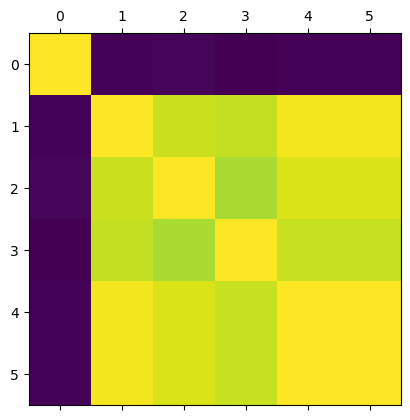

In [21]:
#creating a correlation heatmap with matplotlib
plt.matshow(df_sol_cor.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix for Solar Energy Projects')

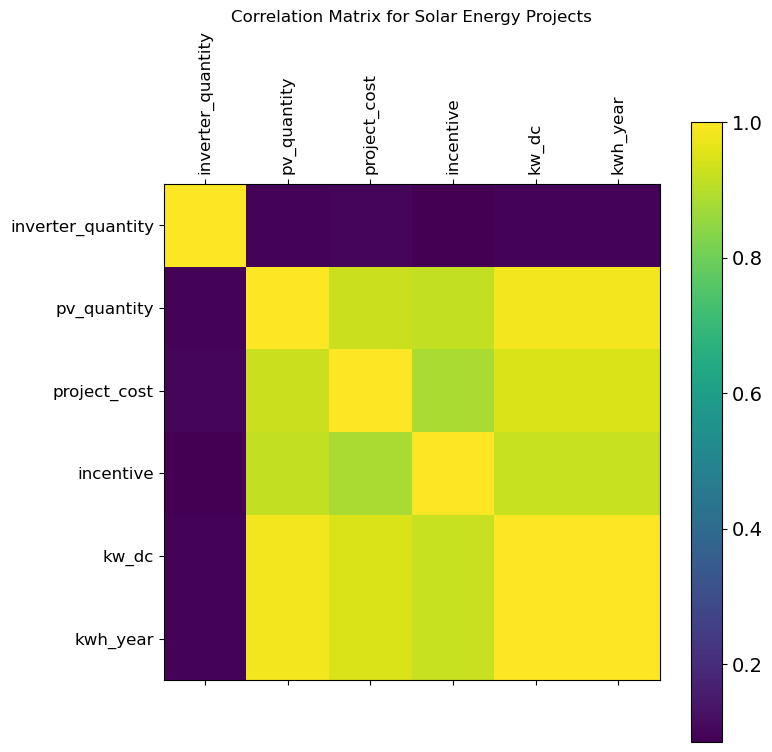

In [22]:
#creating a correlation heatmap with matplotlib, now adding more elements
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sol_cor.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sol_cor.shape[1]), df_sol_cor.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df_sol_cor.shape[1]), df_sol_cor.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix for Solar Energy Projects', fontsize=12) # add title

In [23]:
# Save figure
plt.savefig("fig1.png") 

<Figure size 640x480 with 0 Axes>

In [24]:
#see directory
cwd = os.getcwd()
cwd

'C:\\Users\\isobr\\OneDrive\\02052023Solar Programs NY\\03. Scripts'

##### Correlation heatmap  using Seaborn

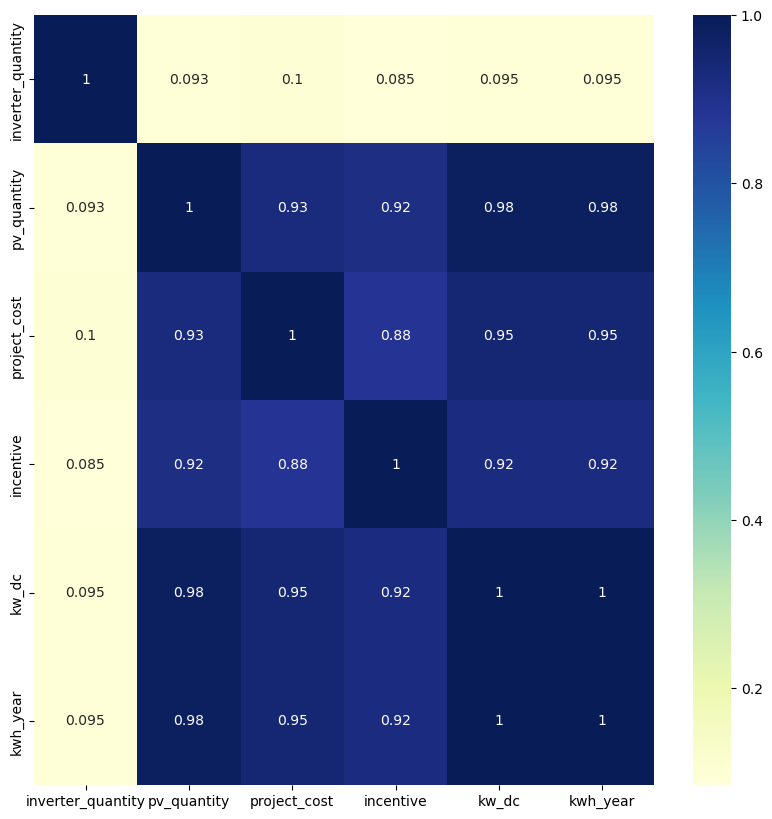

In [25]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
#Now create the correlation heatmap in Seaborn, using the 'annot' method to include the coefficients in the heatmap
fig2=sns.heatmap(df_sol_cor.corr(), cmap="YlGnBu", annot = True, ax = ax)

The heatmap makes it clear where the strongest correllations are. All the correlations are positive. Several variables are strongly correlated, which needs to be accounted for in developing a predictive model. For instance, 'kw_dc' and 'kwh_year' are both positively and perfectly correlated to eachother, which is to be expected for these two variables. The variables 'pv_quantity', 'project_cost' and 'incentive' are all strongly positively correlated to 'kw_dc' and 'kwh_year'. However, 'inverter quantity' is not correlated to any of the variables, except it has a very weak correlation with 'project cost'. 

### 5. Exporting Clean Data Set

In [27]:
df_sol.to_pickle(os.path.join(path, '02. Prepared data', 'solar_power_clean.pkl'))